### Breast Cancer Prediction Modeling

In [119]:
#load dataset
import pandas as pd
import numpy as num 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Breast_cancer_data.csv')
df
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df_clean = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [125]:
df_clean['diagnosis'] = df_clean['diagnosis'].replace({1:'Positive',0:'Negative'})
df_clean

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,Negative
1,20.57,17.77,132.90,1326.0,0.08474,Negative
2,19.69,21.25,130.00,1203.0,0.10960,Negative
3,11.42,20.38,77.58,386.1,0.14250,Negative
4,20.29,14.34,135.10,1297.0,0.10030,Negative
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,Negative
565,20.13,28.25,131.20,1261.0,0.09780,Negative
566,16.60,28.08,108.30,858.1,0.08455,Negative
567,20.60,29.33,140.10,1265.0,0.11780,Negative


<Axes: xlabel='diagnosis', ylabel='count'>

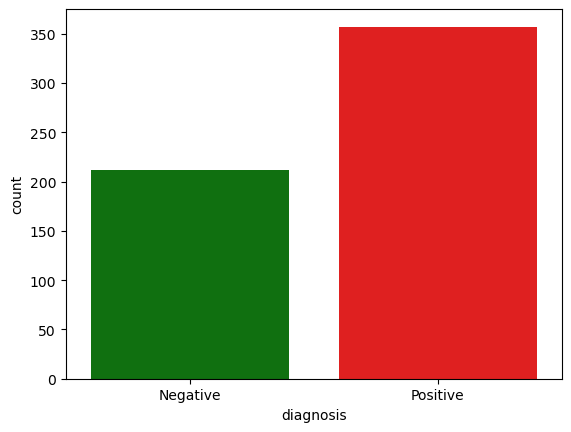

In [126]:
sns.countplot(data=df_clean,x='diagnosis',palette = ['green','red'])    

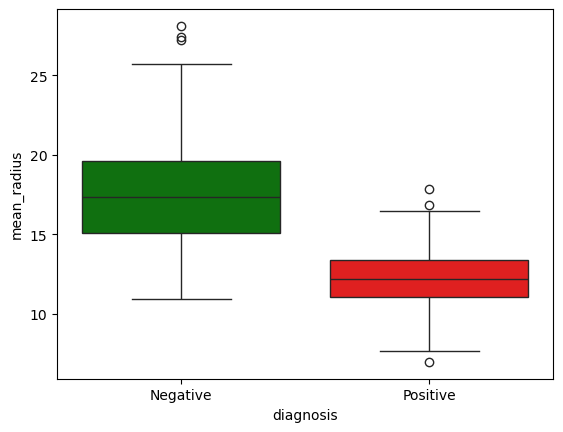

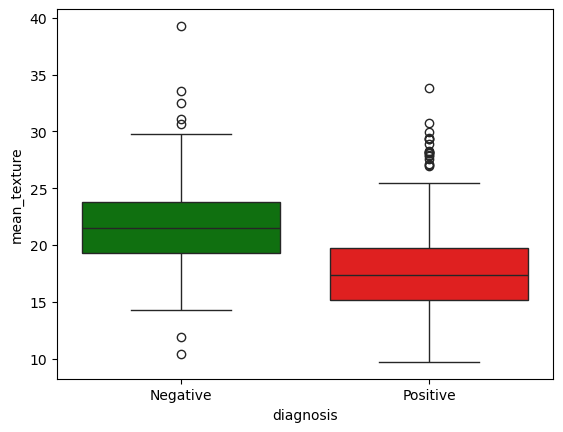

In [127]:
# fig,axes  = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(data=df_clean,x='diagnosis', y = 'mean_radius',palette = ['green','red'])
plt.show()
sns.boxplot(data=df_clean,x='diagnosis', y = 'mean_texture',palette = ['green','red'])
plt.show()



<Axes: xlabel='mean_radius', ylabel='Count'>

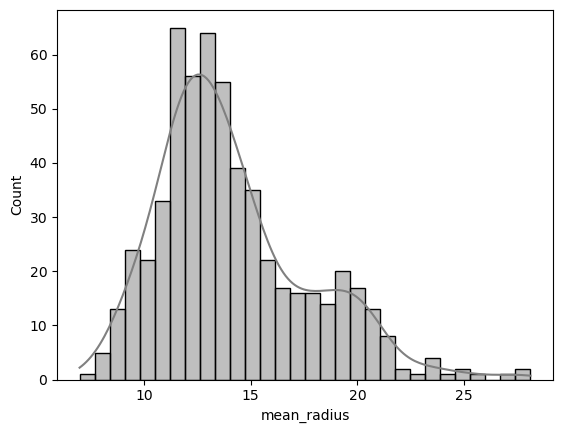

In [128]:
sns.histplot(data=df_clean,  x='mean_radius',bins = 30,kde = 'true',color='gray')

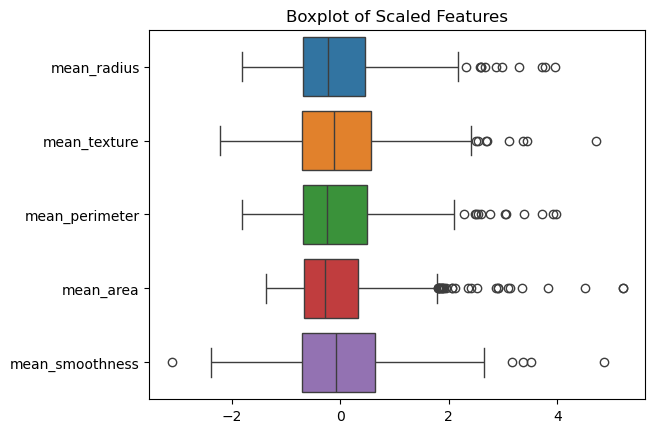

Training Accuracy: 0.9296703296703297
Confusion Matrix:
 [[150  19]
 [ 13 273]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.90       169
    Positive       0.93      0.95      0.94       286

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455

Training Predictions: ['Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Negative'
 'Negative' 'Positive' 'Positive' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive'

In [157]:
X = df_clean.drop(columns=['diagnosis'],axis=1) 
y = df_clean['diagnosis']
#train and test split 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    
#feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)      
#convert to dataframe
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)    
# #visualize the scaled data
sns.boxplot(data=X_train, orient='h')
plt.title('Boxplot of Scaled Features')
plt.show()

#model training  
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()   
model.fit(X_train, y_train)     
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)   
report_train = classification_report(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Confusion Matrix:\n", confusion_train)
print("Classification Report:\n", report_train) 
print("Training Predictions:", y_pred_train)        
#model evaluation on test data
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test) 
confusion_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)
print("Confusion Matrix:\n", confusion_test)
print("Classification Report:\n", report_test) 
print("Test Predictions:", y_pred_test)         
# #visualize the predictions 


# #model training
# from sklearn.linear_model import LogisticRegression
# model =  LogisticRegression()   
# model.fit(X_train,y_train)
# # model evaluation
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# y_pred_train = model.predict(X_train)
# accuracy_train = accuracy_score(y_train, y_pred_train)
# confusion_train = confusion_matrix(y_train, y_pred_train)
# report_train = classification_report(y_train, y_pred_train) 
# print("Training Accuracy:", accuracy_train)
# print("Confusion Matrix:\n", confusion_train)
# print("Classification Report:\n", report_train) 
# print("Training Predictions:", y_pred_train)
# print("Training Predictions:", y_pred_train)
# print("Training Predictions:", y_pred_train)
# #model evaluation on test data
# y_pred_test = model.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_pred_test) 
# confusion_test = confusion_matrix(y_test, y_pred_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 



